## Methods to Compute PDF of Functions of A Single RV

The probability density function (PDF) and cumulative distribution function (CDF) of a transformed random variable can be derived from the PDF or CDF of the original random variable.

In general, if $ \mathbf{y} = g(\mathbf{x}) $, the objective is to determine the PDF of $ \mathbf{y} $ given the function $ g(\cdot) $ and the PDF of $ \mathbf{x} $, or similarly, to determine the CDF of $ \mathbf{y} $ from $ g(\cdot) $ and the CDF of $ \mathbf{x} $.

For example, for each outcome $ \zeta $ of an experiment, $ \mathbf{x}(\zeta) $ and $ \mathbf{y}(\zeta) $ are real numbers. If $ \mathbf{x} $ is a random variable, then $ \mathbf{y} = g(\mathbf{x}) $ is also a random variable.

Here, $ S_{\zeta} $ represents the domain of $ \mathbf{x} $ corresponding to experimental outcomes $ \zeta $, $ S_{\mathbf{x}} $ is the range of $ \mathbf{x} $, and $ S_{\mathbf{y}} $ is the range of $ \mathbf{y} $, where $ \mathbf{y}(\zeta) = g(\mathbf{x}(\zeta)) $.

As an example of a specific transformation, consider the case where the function $ g(\cdot) $ is an invertible, monotonic function, meaning there is a one-to-one correspondence between the values of $ \mathbf{x} $ and $ \mathbf{y} $.

To compute the PDF of $ \mathbf{y} $, we start with the cumulative distribution function (CDF):

$$
P(\mathbf{y} \leq y) = P(g(\mathbf{x}) \leq y) = P(\mathbf{x} \leq g^{-1}(y))
$$

where $ g^{-1}(\cdot) $ is the inverse function of $ g(\cdot) $.

The PDF of $ \mathbf{y} $ can then be found using the formula:

$$
p_{\mathbf{y}}(y) = \frac{p_{\mathbf{x}}(x)}{\left| \frac{dy}{dx} \right|}
$$

The absolute value $ \left| \cdot \right| $ is necessary because $ \frac{dy}{dx} $ can be negative.

In summary, for a monotonic and invertible function, the PDF of $ \mathbf{y} $ can be derived directly from the PDF of $ \mathbf{x} $.

## Example: Exponential Distribution of Force Derived from Accelerated Motion

In this example [B2, Ex 1.3], suppose the acceleration $ \mathbf{a} $ of an object with mass $ m $ is known to be exponentially distributed with parameter $ \lambda $. The probability density function (PDF) of $ \mathbf{a} $ is given by:

$$
p_{\mathbf{a}}(a) = 
\begin{cases} 
\lambda e^{-\lambda a} & a > 0 \\
0 & \text{otherwise} 
\end{cases} 
$$

To estimate the average force produced, we use the relationship $ \mathbf{f} = m \mathbf{a} $. We seek to find the PDF of the force $ \mathbf{f} $.

### Finding the CDF of the Force $ \mathbf{f} $

The cumulative distribution function (CDF) of $ \mathbf{f} $, $ F_{\mathbf{f}}(f) $, is:

$$
P(\mathbf{f} \leq f) = P(m \mathbf{a} \leq f) = P\left( \mathbf{a} \leq \frac{f}{m} \right)
$$

Since the PDF of $ \mathbf{a} $ is exponentially distributed, we can write:

$$
P\left( \mathbf{a} \leq \frac{f}{m} \right) = \int_0^{f/m} \lambda e^{-\lambda a} \, da
$$

Evaluating this integral, we obtain:

$$
P\left( \mathbf{a} \leq \frac{f}{m} \right) = \left[ -e^{-\lambda a} \right]_0^{f/m} = 1 - e^{-\lambda f / m}
$$

Thus, the CDF of $ \mathbf{f} $ is:

$$
F_{\mathbf{f}}(f) = 1 - e^{-\lambda f / m}
$$

### Finding the PDF of the Force $ \mathbf{f} $

To find the PDF $ p_{\mathbf{f}}(f) $, we differentiate the CDF $ F_{\mathbf{f}}(f) $ with respect to $ f $:

$$
p_{\mathbf{f}}(f) = \frac{dF_{\mathbf{f}}(f)}{df} = 
\begin{cases} 
\frac{\lambda}{m} e^{-\lambda f / m} & f \geq 0 \\
0 & \text{otherwise} 
\end{cases} 
$$

### Insight

The derived PDF $ p_{\mathbf{f}}(f) $ indicates that the force $ \mathbf{f} $ follows an exponential distribution scaled by the mass $ m $ and the parameter $ \lambda $. This result aligns with the fact that force is linearly related to acceleration by the constant mass $ m $, and since acceleration $ \mathbf{a} $ is exponentially distributed, so is the force $ \mathbf{f} $. The exponential decay in the PDF suggests that higher forces are less likely, consistent with the nature of exponential distributions.

### Simulation

To verify the theoretical result through simulation, we will:

1. Generate samples of acceleration $ \mathbf{a} $ from an exponential distribution.
2. Derive the force $ \mathbf{f} $ from $ \mathbf{a} $ using the relation $ \mathbf{f} = m \mathbf{a} $.
3. Estimate the pdf and cdf from samples of $ \mathbf{f} $.
4. Plot and compare the empirical cdf and pdf with the theoretical cdf and pdf.

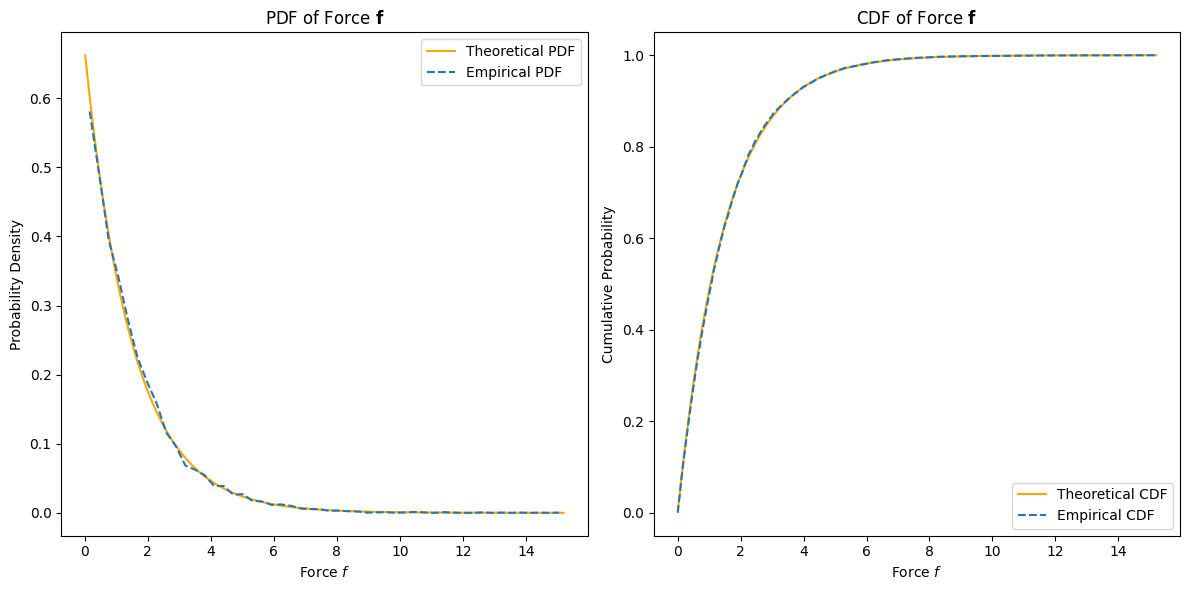

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parameters
lambda_param = 2  # parameter of the exponential distribution
mass = 3  # mass of the object
num_samples = 10000  # number of samples

# Generate samples of acceleration a
a_samples = np.random.exponential(scale=1/lambda_param, size=num_samples)

# Derive force f from acceleration a
f_samples = mass * a_samples

# Theoretical pdf of force f
def pdf_f(f, lambda_param, mass):
    return (lambda_param / mass) * np.exp(-lambda_param * f / mass) * (f > 0)

# Theoretical cdf of force f
def cdf_f(f, lambda_param, mass):
    return 1 - np.exp(-lambda_param * f / mass)

# Generate values for f for theoretical pdf and cdf
f_values = np.linspace(0.01, np.max(f_samples), 1000)  # start from 0.01 to avoid 0
pdf_f_values = pdf_f(f_values, lambda_param, mass)
cdf_f_values = cdf_f(f_values, lambda_param, mass)

# Empirical pdf estimation using histogram
hist, bin_edges = np.histogram(f_samples, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Remove the value at 0, just for plotting purposes
non_zero_indices = bin_centers > 0
bin_centers = bin_centers[non_zero_indices]
hist = hist[non_zero_indices]

# Empirical cdf estimation
sorted_f_samples = np.sort(f_samples)
empirical_cdf = np.arange(1, num_samples + 1) / num_samples

# Plotting
plt.figure(figsize=(12, 6))

# Plot empirical and theoretical pdf
plt.subplot(1, 2, 1)
plt.plot(f_values, pdf_f_values, label='Theoretical PDF', color='orange')
plt.plot(bin_centers, hist, label='Empirical PDF', linestyle='dashed')
plt.title('PDF of Force $\\mathbf{f}$')
plt.xlabel('Force $f$')
plt.ylabel('Probability Density')
plt.legend()

# Plot empirical and theoretical cdf
plt.subplot(1, 2, 2)
plt.plot(f_values, cdf_f_values, label='Theoretical CDF', color='orange')
plt.plot(sorted_f_samples, empirical_cdf, label='Empirical CDF', linestyle='dashed')
plt.title('CDF of Force $\\mathbf{f}$')
plt.xlabel('Force $f$')
plt.ylabel('Cumulative Probability')
plt.legend()

plt.tight_layout()
plt.show()


# Methods of computing the pdf of a function of a random variable

Two methods used to compute the pdf of a function of a random variable include:
* Direct method 
* Leibnitz's rule

## Direct method

The direct method involves using the known function and the pdf (probability density function) of the original random variable to derive the pdf of the transformed random variable.

**APPLICATION.** for backpropagation derivation in the training of a neural network.

### Example: Linear Transformation

Consider the linear transformation $ \mathbf{y} = a\mathbf{x} + b $ with $ a > 0 $. Our objective is to determine the CDF and PDF of $ \mathbf{y} $ given the CDF and PDF of $ \mathbf{x} $ using the direct method.

#### CDF of $ \mathbf{y} $

The cumulative distribution function (CDF) of $ \mathbf{y} $, denoted as $ F_{\mathbf{y}}(y) $, is defined by:

$$
F_{\mathbf{y}}(y) = P(\mathbf{y} \leq y)
$$

Substituting $ \mathbf{y} = a\mathbf{x} + b $ into the inequality, we get:

$$
P(\mathbf{y} \leq y) = P(a \mathbf{x} + b \leq y)
$$

To isolate $ \mathbf{x} $, we rearrange the inequality:

$$
P(a \mathbf{x} + b \leq y) = P\left( \mathbf{x} \leq \frac{y - b}{a} \right)
$$

This expression corresponds to the CDF of $ \mathbf{x} $, so we can write:

$$
P\left( \mathbf{x} \leq \frac{y - b}{a} \right) = F_{\mathbf{x}}\left( \frac{y - b}{a} \right)
$$

#### PDF of $ \mathbf{y} $

To find the probability density function (PDF) of $ \mathbf{y} $, we differentiate the CDF $ F_{\mathbf{y}}(y) $ with respect to $ y $:

$$
p_{\mathbf{y}}(y) = \frac{d}{dy} F_{\mathbf{y}}(y)
$$

Using the chain rule, this becomes:

$$
p_{\mathbf{y}}(y) = \frac{d}{dy} F_{\mathbf{x}}\left( \frac{y - b}{a} \right) = p_{\mathbf{x}}\left( \frac{y - b}{a} \right) \cdot \frac{d}{dy} \left( \frac{y - b}{a} \right)
$$

The derivative $ \frac{d}{dy} \left( \frac{y - b}{a} \right) $ simplifies to $ \frac{1}{a} $, so we have:

$$
p_{\mathbf{y}}(y) = p_{\mathbf{x}}\left( \frac{y - b}{a} \right) \cdot \frac{1}{a}
$$

Thus, the PDF of $ \mathbf{y} $ is given by:

$$
p_{\mathbf{y}}(y) = \frac{1}{a} p_{\mathbf{x}}\left( \frac{y - b}{a} \right)
$$

## Leibniz's Rule Method

Leibniz's rule is a useful tool for differentiating an integral with respect to a parameter, especially when the limits of integration are functions of that parameter.

The rule is stated as:

$$
\frac{d}{du} \int_{A(u)}^{B(u)} F(u, \xi) \, d\xi = \int_{A(u)}^{B(u)} \frac{\partial F(u, \xi)}{\partial u} \, d\xi + F(u, B(u)) \frac{dB(u)}{du} - F(u, A(u)) \frac{dA(u)}{du}
$$

### Applying Leibniz's Rule in the Context of Random Variables

To illustrate how Leibniz's rule applies to the transformation of random variables, consider the transformation $ \mathbf{y} = a\mathbf{x} + b $ with $ a \neq 0 $.

The cumulative distribution function (CDF) of $ \mathbf{y} $, $ F_{\mathbf{y}}(y) $, is:

$$
F_{\mathbf{y}}(y) = P(\mathbf{y} \leq y) = P(a \mathbf{x} + b \leq y) = P\left( \mathbf{x} \leq \frac{y - b}{a} \right) = F_{\mathbf{x}}\left( \frac{y - b}{a} \right)
$$

This can also be expressed as:

$$
F_{\mathbf{x}}\left( \frac{y - b}{a} \right) = \int_{-\infty}^{(y-b)/a} p_{\mathbf{x}}(\xi) \, d\xi
$$

To find the probability density function (PDF) of $ \mathbf{y} $, we differentiate the CDF $ F_{\mathbf{y}}(y) $ with respect to $ y $ using Leibniz's rule:

$$
\frac{d}{dy} \int_{-\infty}^{(y-b)/a} p_{\mathbf{x}}(\xi) \, d\xi
$$

Here, $ u = y $, $ A(y) = -\infty $, and $ B(y) = \frac{y - b}{a} $.

Since $ A(y) $ is a constant (specifically $ -\infty $), we have $ \frac{dA(y)}{du} = 0 $. For $ B(y) = \frac{y - b}{a} $, the derivative is $ \frac{dB(y)}{dy} = \frac{1}{a} $.

Thus, applying Leibniz's rule, we get:

$$
\frac{d}{dy} \int_{-\infty}^{(y-b)/a} p_{\mathbf{x}}(\xi) \, d\xi = \int_{-\infty}^{(y-b)/a} \frac{\partial p_{\mathbf{x}}(\xi)}{\partial y} \, d\xi + p_{\mathbf{x}}\left( \frac{y - b}{a} \right) \cdot \frac{1}{a}
$$

Since $ p_{\mathbf{x}}(\xi) $ does not explicitly depend on $ y $, the partial derivative $ \frac{\partial p_{\mathbf{x}}(\xi)}{\partial y} = 0 $. Therefore:

$$
\frac{d}{dy} \int_{-\infty}^{(y-b)/a} p_{\mathbf{x}}(\xi) \, d\xi = p_{\mathbf{x}}\left( \frac{y - b}{a} \right) \cdot \frac{1}{a}
$$

Thus, the PDF of $ \mathbf{y} $ is:

$$
p_{\mathbf{y}}(y) = \frac{1}{a} p_{\mathbf{x}}\left( \frac{y - b}{a} \right)
$$

**Handling Negative $ a $**

When $ a < 0 $, the transformation reverses the inequality:

$$
F_{\mathbf{y}}(y) = P(\mathbf{y} \leq y) = P(a \mathbf{x} + b \leq y) = P\left( \mathbf{x} \geq \frac{y - b}{a} \right)
$$

Rewriting in terms of the complement:

$$
F_{\mathbf{y}}(y) = 1 - P\left( \mathbf{x} < \frac{y - b}{a} \right) = 1 - \int_{(y-b)/a}^{\infty} p_{\mathbf{x}}(\xi) \, d\xi
$$

Differentiating the CDF:

$$
p_{\mathbf{y}}(y) = \frac{d}{dy} \left[ 1 - \int_{(y-b)/a}^{\infty} p_{\mathbf{x}}(\xi) \, d\xi \right] = -\left( -\frac{1}{a} p_{\mathbf{x}}\left( \frac{y - b}{a} \right) \right) = \frac{1}{|a|} p_{\mathbf{x}}\left( \frac{y - b}{a} \right)
$$

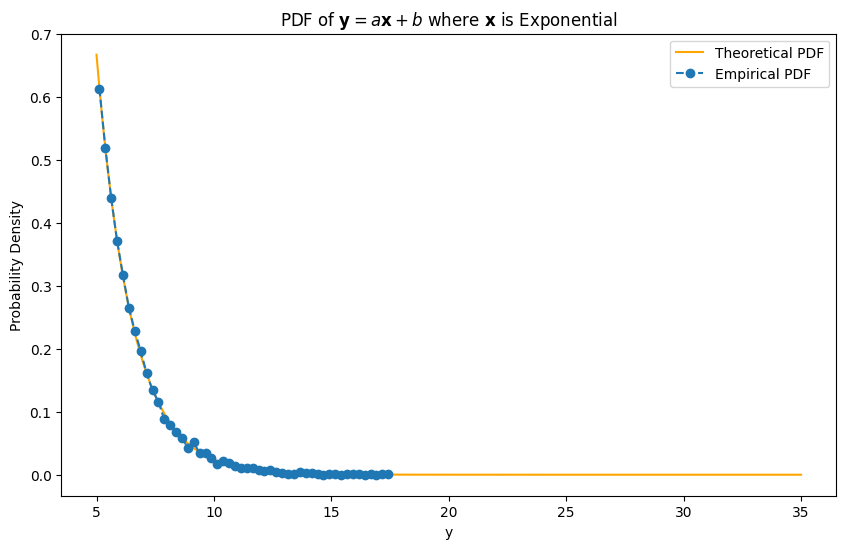

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parameters
lambda_param = 2  # parameter of the exponential distribution for x
a = 3  # scaling factor
b = 5  # translation factor
num_samples = 10000  # number of samples

# Generate samples of x from exponential distribution
x_samples = np.random.exponential(scale=1/lambda_param, size=num_samples)

# Derive y from x using y = a*x + b
y_samples = a * x_samples + b

# Theoretical pdf of y
def pdf_y(y, lambda_param, a, b):
    return (lambda_param / a) * np.exp(-lambda_param * (y - b) / a) * (y >= b)

# Generate values for y for theoretical pdf
y_values = np.linspace(b, b + 10 * a, 1000)
pdf_y_values = pdf_y(y_values, lambda_param, a, b)

# Empirical pdf estimation using histogram
hist, bin_edges = np.histogram(y_samples, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plotting
plt.figure(figsize=(10, 6))

# Plot empirical and theoretical pdf
plt.plot(y_values, pdf_y_values, label='Theoretical PDF', color='orange')
plt.plot(bin_centers, hist, label='Empirical PDF', linestyle='dashed', marker='o')
plt.title('PDF of $\\mathbf{y} = a\\mathbf{x} + b$ where $\\mathbf{x}$ is Exponential')
plt.xlabel('y')
plt.ylabel('Probability Density')
plt.legend()

plt.show()


## General Case for Multiple Roots

When the function $ y = g(x) $ has multiple roots $ x_1, x_2, \ldots, x_m $ such that $ y = g(x_1) = g(x_2) = \cdots = g(x_m) $, the probability density function (PDF) of $ y $ includes contributions from each root. The PDF is adjusted for each root by the absolute value of the derivative $ g'(x_i) $ at that root:

$$
p_{\mathbf{y}}(y) = \sum_{i=1}^{m} \frac{p_{\mathbf{x}}(x_i)}{|g'(x_i)|}
$$

where $ x_i $ are the roots such that $ g(x_i) = y $, and $ g'(x_i) $ is the derivative of $ g $ evaluated at $ x_i $.

### Example with Multiple Roots

Consider a scenario where the random variable $ \mathbf{y} $ is defined as a function of $ \mathbf{x} $ with multiple roots. Specifically, let's examine the case where $ \mathbf{y} = \mathbf{x}^2 $.

For a given $ y $, there are two possible values of $ \mathbf{x} $ that satisfy the equation $ y = \mathbf{x}^2 $: $ x_1 = \sqrt{y} $ and $ x_2 = -\sqrt{y} $.

The derivative of $ g(x) = x^2 $ is:

$$
g'(x) = 2x
$$

Evaluating the derivative at the roots:

$$
g'(\sqrt{y}) = 2\sqrt{y}, \quad g'(-\sqrt{y}) = -2\sqrt{y}
$$

According to the formula for multiple roots, the PDF of $ \mathbf{y} $ is:

$$
p_{\mathbf{y}}(y) = \frac{p_{\mathbf{x}}(x_1)}{|g'(x_1)|} + \frac{p_{\mathbf{x}}(x_2)}{|g'(x_2)|}
$$

Substituting the values, the PDF of $ \mathbf{y} $ becomes:

$$
p_{\mathbf{y}}(y) = \frac{p_{\mathbf{x}}(\sqrt{y})}{|2\sqrt{y}|} + \frac{p_{\mathbf{x}}(-\sqrt{y})}{|2\sqrt{y}|}
$$

Since $ p_{\mathbf{x}}(\sqrt{y}) = p_{\mathbf{x}}(-\sqrt{y}) $ for symmetric distributions (such as the normal distribution), we obtain:

$$
p_{\mathbf{y}}(y) = \frac{2p_{\mathbf{x}}(\sqrt{y})}{2\sqrt{y}} = \frac{p_{\mathbf{x}}(\sqrt{y})}{\sqrt{y}}
$$

This expression is valid for $ y \geq 0 $, and $ p_{\mathbf{y}}(y) = 0 $ for $ y < 0 $.

### Specific Distribution of $ \mathbf{x} $

Assume $ \mathbf{x} $ follows a standard normal distribution, with the PDF given by:

$$
p_{\mathbf{x}}(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2 / 2}
$$

Then, the PDF of $ \mathbf{y} $ (for $ y \geq 0 $) is:

$$
p_{\mathbf{y}}(y) = \frac{p_{\mathbf{x}}(\sqrt{y})}{\sqrt{y}} = \frac{1}{\sqrt{2\pi}} \frac{e^{-\frac{(\sqrt{y})^2}{2}}}{\sqrt{y}} = \frac{1}{\sqrt{2\pi y}} e^{-y / 2}
$$

Thus, the PDF of $ \mathbf{y} $ is:

$$
p_{\mathbf{y}}(y) = 
\begin{cases} 
\frac{1}{\sqrt{2\pi y}} e^{-y / 2} & y \geq 0 \\
0 & y < 0 
\end{cases}
$$

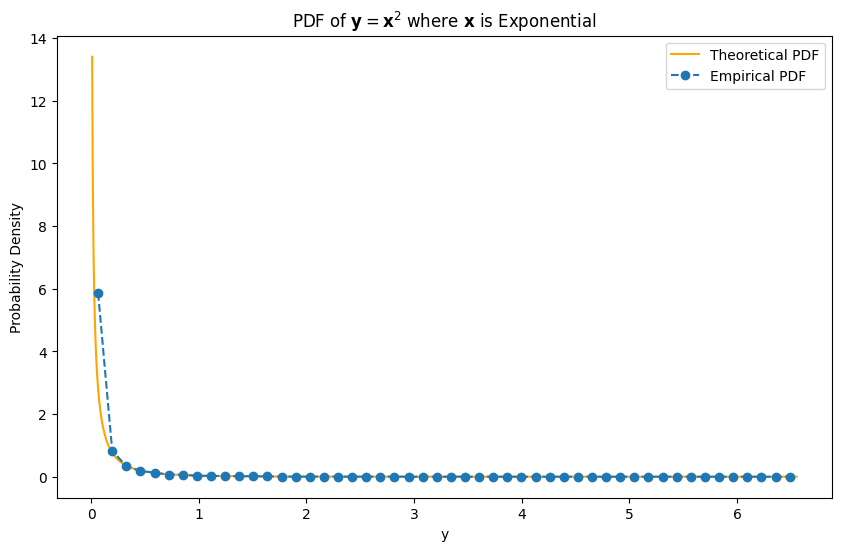

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parameters
lambda_param = 4  # rate parameter of the exponential distribution
num_samples = 10000  # number of samples

# Generate samples of x from exponential distribution
x_samples = np.random.exponential(scale=1/lambda_param, size=num_samples)

# Derive y from x using y = x^2
y_samples = x_samples ** 2

# Theoretical pdf of y
def pdf_y(y, lambda_param):
    pdf = np.zeros_like(y)
    positive_indices = y > 0
    pdf[positive_indices] = (lambda_param / 2) * np.exp(-lambda_param * np.sqrt(y[positive_indices])) / np.sqrt(y[positive_indices])
    return pdf

# Generate values for y for theoretical pdf
y_values = np.linspace(0.01, np.max(y_samples), 1000)  # start from a small positive value to avoid zero
pdf_y_values = pdf_y(y_values, lambda_param)

# Empirical pdf estimation using histogram
hist, bin_edges = np.histogram(y_samples, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plotting
plt.figure(figsize=(10, 6))

# Plot empirical and theoretical pdf
plt.plot(y_values, pdf_y_values, label='Theoretical PDF', color='orange')
plt.plot(bin_centers, hist, label='Empirical PDF', linestyle='dashed', marker='o')
plt.title('PDF of $\\mathbf{y} = \\mathbf{x}^2$ where $\\mathbf{x}$ is Exponential')
plt.xlabel('y')
plt.ylabel('Probability Density')
plt.legend()

plt.show()
